In [1]:
import gymnasium as gym
from scripts.DQN_Optimizer import DQN_Optimizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
env = gym.make("CartPole-v1")

In [3]:
#####################################
## TEST LEARNING RATES/ Batch size
#######################################

param_dict = {
                "batch_size" : 200,
                "gamma" : 0.99,
                "eps_start" : 0.99,
                "eps_end" : 0.1,
                "eps_decay" : 0.95,
                "learning_rate" : 1e-3,
                "train_episodes" : 40,
                "test_episodes" : 10,
                "steps_between_updates": 50
                }

In [4]:
hyperparam_to_search = "learning_rate"
nb_seeds = 3
params_list = [1e-4,1e-3,1e-2]
seed_list = [42,380,479]
nb_params = len(params_list)

optim_seeds = np.tile(seed_list,3)
optim_params = np.repeat(params_list,3)
    

In [5]:
seed_rewards = []
all_episode_rewards = []
all_epsilons = []
for iteration in range(len(optim_seeds)):
    print("======== running DQN optimization ==========")
    print("seed: {}. {} : {}".format(optim_seeds[iteration],hyperparam_to_search,optim_params[iteration]))

    param_dict[hyperparam_to_search] = optim_params[iteration]
    dqn_opt = DQN_Optimizer(env = env, seed = int(optim_seeds[iteration]), replay_memory_size= 100000, param_dict=param_dict)
    dqn_opt.set_optimizer('adam')
    seed_rewards.append(dqn_opt.run_optimization(fill_rp_memory=True))
    all_episode_rewards.append(dqn_opt.episode_cumulative_reward)
    all_epsilons.append(dqn_opt.epsilons)

pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 100000


Current train episode eps : 0.13: 100%|██████████| 40/40 [00:08<00:00,  4.93it/s]


Optimization complete
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 100000


Current train episode eps : 0.13: 100%|██████████| 40/40 [00:07<00:00,  5.60it/s]


Optimization complete
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 100000


Current train episode eps : 0.13: 100%|██████████| 40/40 [00:07<00:00,  5.29it/s]


Optimization complete
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 100000


Current train episode eps : 0.13: 100%|██████████| 40/40 [01:09<00:00,  1.73s/it]


Optimization complete
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 100000


Current train episode eps : 0.13: 100%|██████████| 40/40 [00:58<00:00,  1.47s/it]


Optimization complete
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 100000


Current train episode eps : 0.13: 100%|██████████| 40/40 [00:58<00:00,  1.46s/it]


Optimization complete
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 100000


Current train episode eps : 0.13: 100%|██████████| 40/40 [00:39<00:00,  1.00it/s]


Optimization complete
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 100000


Current train episode eps : 0.13: 100%|██████████| 40/40 [00:43<00:00,  1.10s/it]


Optimization complete
pytorch will run on cpu
Filling buffer memory...
Buffer memory filled, size: 100000


Current train episode eps : 0.13: 100%|██████████| 40/40 [00:44<00:00,  1.12s/it]

Optimization complete


In [38]:
def plot_test_rewards(seed_rewards, optim_params,param_name , individual = False, additionnal_info = ""):

    test_rewards = []
    test_episodes = []
    seeds = []
    params = []

    for iteration, rewards in enumerate(seed_rewards):
        for episode_idx, reward in enumerate(rewards):
            test_rewards.append(reward)
            test_episodes.append(episode_idx*10)
            seeds.append(iteration)
            params.append(optim_params[iteration])

    df = pd.DataFrame({
        'Episode': test_episodes,
        'Test_rewards': test_rewards,
        'Seed': seeds,
        param_name: params
    })
    df_name = "Test_rewards" + "varying_" + param_name + "_" + additionnal_info 
    df.to_csv(df_name)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    if individual:
        sns.lineplot(data=df, x='Episode', y='Test_rewards', hue = param_name, legend="full", palette = sns.color_palette("hls", 8))
    else:
        sns.lineplot(data=df, x='Episode', y='Test_rewards')
        
    plt.title('Test rewards with varying {}'.format(param_name))
    plt.xlabel('Episode')
    plt.ylabel('Test_rewards')
    plt.show()


def plot_train_rewards(seed_rewards, optim_params,param_name , individual = False, additionnal_info = ""):

    test_rewards = []
    test_episodes = []
    seeds = []
    params = []

    for iteration, rewards in enumerate(seed_rewards):
        for episode_idx, reward in enumerate(rewards):
            test_rewards.append(reward)
            test_episodes.append(episode_idx)
            seeds.append(iteration)
            params.append(optim_params[iteration])

    df = pd.DataFrame({
        'Episode': test_episodes,
        'Train_rewards': test_rewards,
        'Seed': seeds,
        param_name: params
    })
    df_name = "Train_rewards" + "varying_" + param_name + "_" + additionnal_info 
    df.to_csv(df_name)
    
    # Plot the data
    plt.figure(figsize=(10, 6))
    if individual:
        sns.lineplot(data=df, x='Episode', y='Train_rewards', hue = param_name, legend="full", palette = sns.color_palette("hls", 8))
    else:
        sns.lineplot(data=df, x='Episode', y='Train_rewards')
        
    plt.title('Train rewards with varying {}'.format(param_name))
    plt.xlabel('Episode')
    plt.ylabel('Train rewards')
    plt.show()

C:\Users\David\AppData\Local\Temp\ipykernel_19256\363878431.py:29: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(data=df, x='Episode', y='Test_rewards', hue = param_name, legend="full", palette = sns.color_palette("hls", 8))


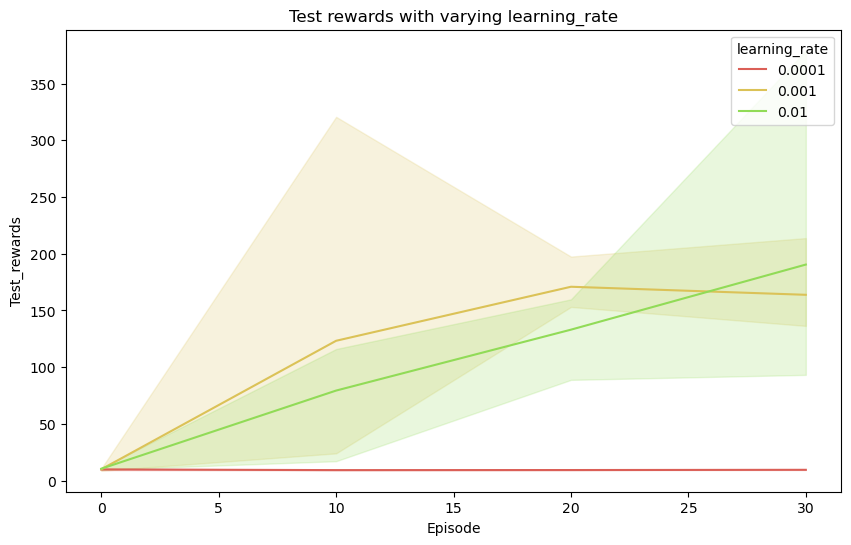

In [39]:
plot_test_rewards(seed_rewards, param_name = hyperparam_to_search, optim_params = optim_params, individual=True)

C:\Users\David\AppData\Local\Temp\ipykernel_19256\363878431.py:67: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.lineplot(data=df, x='Episode', y='Train_rewards', hue = param_name, legend="full", palette = sns.color_palette("hls", 8))


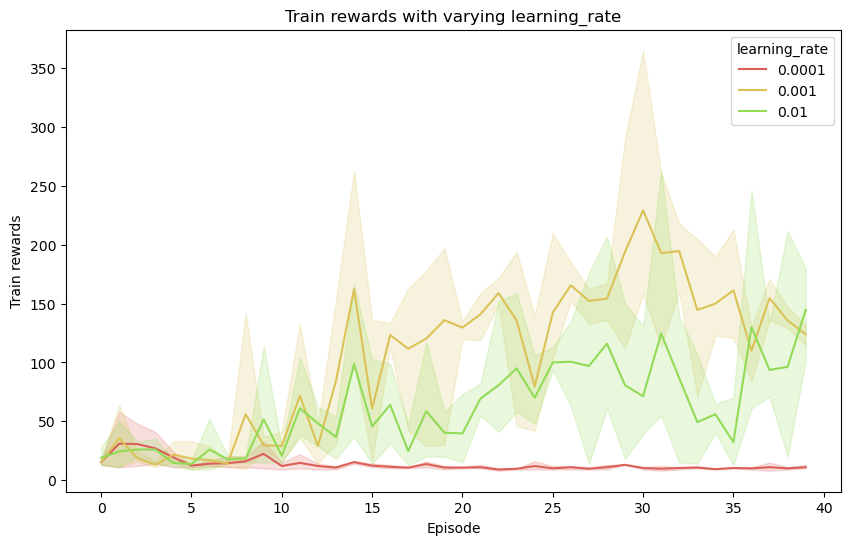

In [40]:
plot_train_rewards(all_episode_rewards, param_name = hyperparam_to_search, optim_params = optim_params, individual=True)

In [ ]:
np.save(file = "all_episode_rewards_3seeds_2kep_train" , arr =np.array(all_episode_rewards) , allow_pickle = True)
np.save(file = "all_epsilons_3seeds_2kep_train" , arr = np.array(all_epsilons), allow_pickle = True)

In [16]:
arr_train  = np.array(all_episode_rewards)
arr_test = np.array(seed_rewards)

<Axes: >

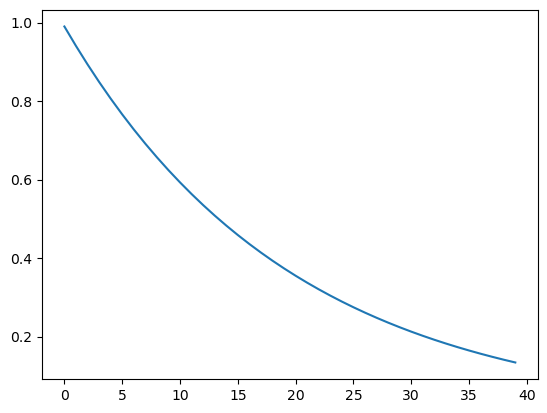

In [37]:
sns.lineplot(dqn_opt.epsilons)

(9, 4)